In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import csv
import pandas as pd
import json
import time
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import string 
import unicodedata as ud
from greek_stemmer import GreekStemmer
import pymongo
import numpy as np
import re
import networkx as nx
import indexer as ind


### Find candidate domain-specific stopwords and clean index

In [3]:
mongo_client = pymongo.MongoClient("mongodb://localhost:27017/")
#mongo_client.drop_database("GreekParliamentProceedings")
client = mongo_client["GreekParliamentProceedings"]
index = client["InvertedIndex"]
database = client["Database"]

In [3]:
numdocs = list(index.find({ }, { "_id": 0, "list.numdoc": 1 }))
x = [numdocs[i]['list']['numdoc'] for i in range(len(numdocs))]
numdocs = {}
for numdoc in set(x):
    numdocs[numdoc] = x.count(numdoc)

In [4]:
print(f'Υπαρχουν {numdocs[1267]} documents με numdoc==1267')

Υπαρχουν 1 documents με numdoc==1267


(array([3052.,  794.,  315.,  180.,  110.,   86.,   63.,   43.,   38.,
          22.,   20.,   14.,   14.,   12.,   11.,    8.,    7.,    4.,
           8.,    5.,    4.,    5.,    5.]),
 array([     0.,   5000.,  10000.,  15000.,  20000.,  25000.,  30000.,
         35000.,  40000.,  45000.,  50000.,  55000.,  60000.,  65000.,
         70000.,  75000.,  80000.,  85000.,  90000.,  95000., 100000.,
        105000., 110000., 115000.]),
 <BarContainer object of 23 artists>)

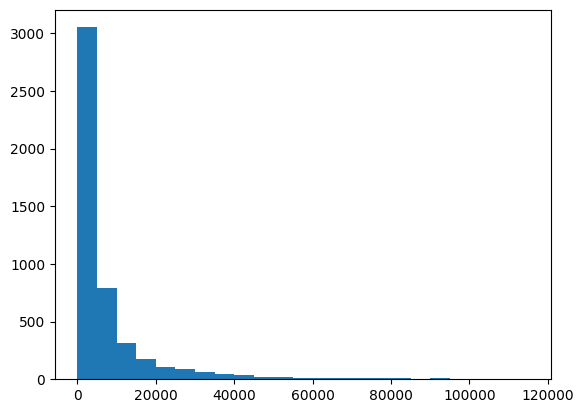

In [5]:
import matplotlib.pyplot as plt
n_bins = 20

# Generate two normal distributions

fig, axs = plt.subplots()

# We can set the number of bins with the *bins* keyword argument.
axs.hist(numdocs, bins=[i for i in range(0,120000,5000)])

In [ ]:
threshold = list(index.find({"list.numdoc":{"$gt":100000}}, { "_id": 1, "list.numdoc": 1 }))
print([threshold[i]['_id'] for i in range(len(threshold))])
with open('domain-specific-stopwords.txt', 'w', encoding='utf8') as f:
    for i in range(len(threshold)):
        f.write(threshold[i]['_id'])
        f.write('\n')

In [6]:
threshold = list(index.find({"list.numdoc":2}, { "_id": 1, "list.numdoc": 1 }))
print([threshold[i]['_id'] for i in range(len(threshold))][:100])

['0014', 'στουριδ', '0016', '0017', '0018', '0025', '0026', 'μικροϋπολογισμο', 'τεκτεν', 'στρογγυλευμεν', 'απαγορευοντ', 'αυξηντ', 'εθνοβορ', 'ενεργηθεντ', 'κουτσογιωρ', '1584/23', '1584/87', '671/1982', '2727/75', 'm/v', 'κουραζομεθ', '0062', 'διετρ', 'bενιζελου', '0067', 'αλληλοπαραχωρης', '0070', '0071', 'κοκιν', 'λαϊκιστικοι', 'κατακρεουγ', 'τρομοκρατουντ', 'λουδοβικ', 'παινεμ', 'σεσκουλ', 'γιασπερς', 'ακυριολεξ', 'επραττατ', 'τιραντ', 'σιχας', 'αντεκδικειτα', 'επανελαμβαν', 'χολοσκατ', 'ρεβεραντζ', 'παρεπεμποντ', 'ταυτοσιμ', 'ζγουριδ', 'δημοσθ', 'επικυρουτα', 'επιδειχθεντ', '0112', 'χασομ', 'κρινομ', '68/88', '0117', '0118', 'προσορμιστ', 'φλαμινγκ', 'ξαναφερθ', 'πελωψ', 'μαστευ', 'προδικασατ', 'συνεκαλυψ', 'παρεμποδισατ', '0131', 'αποσχομ', 'εφτακαθαρ', 'σχηματιζατ', 'σταλικ', 'εγεννωντ', 'ραϊμενταλ', 'αιθουσασελιδ', '0159', 'ζητωκραυγαστ', 'εξαιρετον', '0164', 'μαβερικ', '0166', 'συνεδριασις', 'linder', 'σημενς', '0170', 'εκτυπουτα', 'εξεδιωχθην', 'βερει', 'δικηγορισκ', 'πραγ

In [7]:
import re

to_remove = list(index.find({"_id":{"$regex":"^[0-9][0-9][0-9].*[α-ω]$"}},{ "_id": 1, "list": 0}))
#x = re.findall("^[0-9][0-9][0-9].*[α-ω]$", txt)
print(to_remove[:100])

[{'_id': '000/8/245258/σ'}, {'_id': '000/οικ'}, {'_id': '0000%απο'}, {'_id': '00010ο'}, {'_id': '00012%απο'}, {'_id': '00016%απο'}, {'_id': '0002%απο'}, {'_id': '00020%απο'}, {'_id': '00024%απο'}, {'_id': '0002γραφημα'}, {'_id': '0002θεωρουμε'}, {'_id': '0003%απο'}, {'_id': '0003επιλεξει'}, {'_id': '0004γων'}, {'_id': '0006%απο'}, {'_id': '0006που'}, {'_id': '0008%απο'}, {'_id': '0008μοκρατια'}, {'_id': '0008ο'}, {'_id': '0009ορισμενες'}, {'_id': '000αλλοτε'}, {'_id': '000αυτα'}, {'_id': '000β'}, {'_id': '000γ'}, {'_id': '000για'}, {'_id': '000δ'}, {'_id': '000διδακτικο'}, {'_id': '000δραχμες'}, {'_id': '000δραχμων'}, {'_id': '000δρχ'}, {'_id': '000ε'}, {'_id': '000επι'}, {'_id': '000ετος'}, {'_id': '000ευρω'}, {'_id': '000η'}, {'_id': '000και'}, {'_id': '000καταστηματαρχες'}, {'_id': '000μοναδων'}, {'_id': '000νται'}, {'_id': '000ο'}, {'_id': '000πανω'}, {'_id': '000προηγουμενησμετ'}, {'_id': '000σελιδα'}, {'_id': '000στρ'}, {'_id': '000στρεμματα'}, {'_id': '000στρεμματων'}, {'_id': '

### Single Document Keyword Extraction with python libraries

In [4]:
document = list(database.find({"_id":"1"}, { "_id": 0, "speech": 1 }))
doc = document[0]['speech']
words_in_row = ind.preprocess_doc(document[0]['speech'], stopwords)

TypeError: argument of type 'LazyCorpusLoader' is not iterable

In [ ]:
import yake
with open('stopwords.txt', encoding='utf-8') as file:
  stopwords = [line.rstrip() for line in file]
kw_extractor = yake.KeywordExtractor(top=10, stopwords=stopwords)
keywords = kw_extractor.extract_keywords(doc)
for kw, v in keywords:
  print("Keyphrase: ",kw, ": score", v)

In [ ]:
print(get_keywords(database, "0"))

### Single Document Keyword Extraction with Networkx

In [5]:
def create_graph_of_words(words_in_row:list)->nx.DiGraph:
    """Creates a graph of words for a single document
    
    """
    g = nx.DiGraph()
    #add unique words as nodes of the graph
    g.add_nodes_from(set(words_in_row))
    for j,word in enumerate(words_in_row):
        #add word as a node if it doesnt exist
        #if word not in g.nodes:
            #g.add_node(word)    
        #generate list of indexes
        gen = (x for x in range(j+1,j+3) if x<len(words_in_row))
        for k in gen:
            #avoid self-loops
            if(word == words_in_row[k]):
                pass
            #if edge does not exist create it, else increase edge weight
            elif((word, words_in_row[k]) not in g.edges):
                g.add_edge(word, words_in_row[k])
                g[word][words_in_row[k]]['weight'] = 1
            else:
                g[word][words_in_row[k]]['weight'] += 1
    return g

def generate_graphs(total_documents:int, chunksize:int, database_collection):
    """Creates graphs of words for documents of a given collection of documents
    
    """
    chunk = []
    counter = 0
    start_time = time.time()
    #get inverted index
    ticks = [x for x in range(0,total_documents,chunksize)]
    ticks.append(total_documents)
    graphs=[]
    with open('stopwords.txt', encoding='utf-8') as file:
        stopwords = [line.rstrip() for line in file]
    for j in range(len(ticks)-1):
        tokens = {}
        chunk = list(database_collection.find({ }, { "_id": 1, "speech": 1 })[ticks[j]:ticks[j+1]])
        print("Length of chunk: ", len(chunk))
        size_distribution = []
        #chunk = ["This is a sentance","This is another one"]
        #for each speech
        for i, row in enumerate(chunk):
            words_in_row = ind.preprocess_doc(row["speech"], stopwords)
            graph = create_graph_of_words(words_in_row)
            graphs.append(graph)
   
        #insert chunk of tokens to a mongo collection named index
        
        print("CHUNK", counter, " FINISHED")
    
    return graphs
def weighted_undirected_k_core(graph:nx.Graph):
    k = 0
    core_numbers = dict([(node,0) for node in graph.nodes])
    degrees = dict(graph.degree(weight='weight'))
    while(len(graph.nodes)>0):
        min_node = get_min_node(degrees)
        #print(min_node)
        if(degrees[min_node]>k):
            core_numbers[min_node] = degrees[min_node]
            k = core_numbers[min_node]
        else:
            core_numbers[min_node] = k
        for neighbor in graph.neighbors(min_node):
            degrees[neighbor] = degrees[neighbor]  - graph.get_edge_data(neighbor, min_node)['weight']
        graph.remove_node(min_node)
        del degrees[min_node]
        
    return core_numbers

def get_min_node(degrees):
    #sort degrees in increasing orders
    degrees = sorted(degrees.items(), key=lambda d: d[1])
    return degrees[0][0]

#returns the keywords for a document
def get_keywords(database_collection, document_id:string)->list:
    with open('stopwords.txt', encoding='utf-8') as file:
        stopwords = [line.rstrip() for line in file]
    with open('domain-specific-stopwords.txt', encoding='utf-8') as file:
        domain_specific_stopwords = [line.rstrip() for line in file]
    tokens = {}
    #read documents from MongoDB in chunks
    document = list(database_collection.find({"_id":document_id}, { "_id": 0, "speech": 1 }))
    size_distribution = []
    #chunk = ["This is a sentance","This is another one"]
    #for each speech
    words_in_row = ind.preprocess_doc(document[0]['speech'], stopwords)
    words_in_row = [word for word in words_in_row if word not in domain_specific_stopwords]
    graph = create_graph_of_words(words_in_row)
    #extract keywords and insert to mongo
    #core_numbers = weighted_undirected_k_core(graph)
    centrality = nx.pagerank(graph)
    centrality = dict(sorted(centrality.items(), key=lambda item: -item[1]))
    #print(centrality)
    words = list(centrality.keys())
    keywords = words[:int(len(words_in_row)/4)]

    return keywords

#returns the keywords given a directed, unweighted graph of words
def extract_keywords(graph_of_words:nx.DiGraph)->list:
    """Extracts keywords from a graph of words
    
    """
    main_core = nx.k_core(graph_of_words)
    print("Graph size: ", len(graph_of_words.nodes))
    print("Main core size: ", len(main_core.nodes))
    main_core_centrality = nx.in_degree_centrality(main_core)
    print(main_core_centrality)
    values = main_core_centrality.values()
    keys = main_core_centrality.keys()
    
    #ToDo: find a criterion on which keywords to keep from main core
    import statistics as stats
    median = (stats.median(values))
    keywords = [keyword for keyword in main_core_centrality.keys() if main_core_centrality[keyword]>=median] 
    return keywords

In [6]:
mongo_client = pymongo.MongoClient("mongodb://localhost:27017/")
#mongo_client.drop_database("GreekParliamentProceedings")
client = mongo_client["GreekParliamentProceedings"]
index = client["InvertedIndex"]
database = client["Database"]

In [10]:
#get keywords for a single document
keywords = get_keywords(database, "63428")
print(keywords[:20])
import yake

with open('stopwords.txt', encoding='utf-8') as file:
  stopwords = [line.rstrip() for line in file]
document = list(database.find({"_id":"20"}, { "_id": 0, "speech": 1 }))
doc = document[0]['speech']
words_in_row = ind.preprocess_doc(document[0]['speech'], stopwords)
kw_extractor = yake.KeywordExtractor(top=10, stopwords=stopwords)
keywords = kw_extractor.extract_keywords(doc)
print( )
for kw, v in keywords:
  print("Keyphrase: ",kw, ": score", v)

['προγραμμ', 'εργ', 'ελλαδ', 'αλλαγ', 'εποχ', 'προχωρ', 'αποκρατικοποιης', 'λα', 'ηδη', 'τομ', 'σημαντικ', 'αγαπητ', 'διοικης', 'καλ', 'φορολογ', 'εκσυγχρονισμ', 'εξυγιανς', 'κρατ', '1991', 'βαρ']

Keyphrase:  Μέγαρο Βουλής Αγαπητέ : score 0.016875460054915633
Keyphrase:  Τσαλδάρη Μέγαρο Βουλής : score 0.018061732484664847
Keyphrase:  Αθανάσιο Τσαλδάρη Μέγαρο : score 0.02139547982025511
Keyphrase:  κύριοι συνάδελφοι : score 0.02363532523553325
Keyphrase:  Παπανδρέου Πρόεδρος Πανελληνίου : score 0.03528529969250768
Keyphrase:  Πρόεδρος Πανελληνίου Σοσιαλιστικού : score 0.03528529969250768
Keyphrase:  Πανελληνίου Σοσιαλιστικού Κινήματος : score 0.03528529969250768
Keyphrase:  Βουλής : score 0.037353559438839376
Keyphrase:  Βουλής κύριο Αθανάσιο : score 0.039177003790680065
Keyphrase:  κύριο Αθανάσιο Τσαλδάρη : score 0.04677562204752342


In [28]:
import spacy
def transform_uni_to_ngram(unigram_keywords, text):
  """
  Candidate unigrams that form ngrams in the text
  are merged and now form a single candidate keyphrase.
  """
  # set the spacy model
  nlp = spacy.load("el_core_news_md")

  # function that tells if spacy token is keyword or not
  ckw_getter = lambda token: token.text.lower() in unigram_keywords
  
  # set that function as token extension (as attribute with ._)
  #token = token.set_extension("is_ckw", getter=ckw_getter, force=True)

  # variable to store resulting keyphrases
  res = []
  
  # split original text in sentences
  sentences = nltk.sent_tokenize(text)
  
  for sent in sentences:
      # start keyphrase as empty string
      merged_tokens = ''
      
      # process sentence with spacy model defined beforehand
      sent = nlp(sent)
      
      for token in sent:
          # if token is candidate KW (according to func defined before)
          token = token.set_extension("is_ckw", getter=ckw_getter, force=True)
          if token._.is_ckw:
              print(token)
              # add it to keyphrase
              merged_tokens += token.text.lower() + ' '
         
         # means that sequence of tokens in text that are candidate KW ends
          else:
              # check if keyphrase not empty and already not in list of results
              if merged_tokens != '' and merged_tokens.strip() not in res:
                  
                  # only add keyphrases for now, no unigrams
                  if len(merged_tokens.strip().split(' ')) != 1:
                      res.append(merged_tokens.strip())
                  
                  # set keyphrase as empty string again
                  merged_tokens = ''


  for uni in unigram_keywords:
      # only add unigram KW to results list if not there already
      if uni not in res:
          
          add_uni = True
          
          for other in res:  
              # only add unigram KW to results list if not used in keyphrase somewhere
              if uni in other:
                  add_uni = False
          
          if add_uni:
              res.append(uni)   
  
  return res

In [29]:
text = document = list(database.find({"_id":"63428"}, { "_id": 0, "speech": 1 }))

aaaa = transform_uni_to_ngram(keywords,text[0]['speech'])


AttributeError: 'NoneType' object has no attribute '_'

In [ ]:
#test, pls ignore
dataframe1 = list(database.find({ }, { "_id": 1, "speech": 1 })[:100000])
for i, row in enumerate(dataframe1):
    #print(row["_id"])
    pass

In [ ]:
#print(graphs[0].edges)
import matplotlib.pyplot as plt
 
plt.savefig('graph.png')
# larger figure size
#pos = nx.circular_layout(graphs[2])

plt.figure(3,figsize=(12,12)) 
nx.draw_networkx(graphs[0], with_labels=True,node_size=80,font_size=15)
plt.show()

### Extract keywords for a parliament member

In [ ]:
mongo_client = pymongo.MongoClient("mongodb://localhost:27017/")
#mongo_client.drop_database("GreekParliamentProceedings")
client = mongo_client["GreekParliamentProceedings"]
index = client["InvertedIndex"]
database = client["Database"]

In [ ]:
#get distinct parliament member names in a list
member_names = database.distinct("member_name")

In [ ]:
def get_member_keywords(member_name:string)->list:
    #get ids of member's total speeches
    member_speeches = list(database.find({"member_name": member_name}, { "_id": 1, "speech": 0 }))
    total_keywords = []
    for speech in member_speeches:
        keywords = get_keywords(database, speech['_id'])
        total_keywords.extend(keywords)
    keyword_frequency = {}
    for keyword in set(total_keywords):
        keyword_frequency[keyword] = total_keywords.count(keyword)
    keyword_frequency = sorted(keyword_frequency.items(), key=lambda d: d[1], reverse=True)
    return keyword_frequency[:10]

In [ ]:
print(get_member_keywords(member_name=member_names[10]))

## Networkx library test

In [ ]:
#networkx library
import networkx as nx
g = nx.Graph()
l = ['1','2','3']
#g.add_nodes_from(l)

for word in l:
    if(word not in list(g.nodes)):
        g.add_node(word)
for e in list(g.nodes):
    print(e)
    
g.add_edge('1','2')
g.add_edge('2','3')
if(('1','2') in g.edges):
    print(' in')
for e in list(g.edges):
    print(e)

In [ ]:

graphs = generate_graphs(100,100,database)
graph = graphs[78]
for node in graph.nodes:
    for neighbor in graph.neighbors(node):
        if(graph.get_edge_data(neighbor, node)['weight']>1):
            print(graph.get_edge_data(neighbor, node)['weight'])

In [ ]:
core_numbers = dict(core_numbers)
max_core = [num for num in core_numbers.values() if(num==2)]
print(len(max_core))

In [ ]:
test = nx.Graph()
test.add_nodes_from([1,2,3,4,5,6])
test.add_edge(1,2)
test[1][2]['weight'] = 2
test.add_edge(1,4)
test[1][4]['weight'] = 4

test.add_edge(2,3)
test[2][3]['weight'] = 3

test.add_edge(3,4)
test[3][4]['weight'] = 5

test.add_edge(3,5)
test[3][5]['weight'] = 7

test.add_edge(4,5)
test[4][5]['weight'] = 6

test.add_edge(5,6)
test[5][6]['weight'] = 8



In [ ]:
k = 0
core_numbers = dict([(node,0) for node in test.nodes])
#print(graph.nodes)
print('sdfdsf.',len(nx.k_core(test).nodes))
degrees = dict(test.degree(weight='weight'))
while(len(test.nodes)>0):
    min_node = get_min_node(degrees)
    #print(min_node)
    if(degrees[min_node]>k):
        core_numbers[min_node] = degrees[min_node]
        k = core_numbers[min_node]
    else:
        core_numbers[min_node] = k
    for neighbor in test.neighbors(min_node):
        print(neighbor)
        degrees[neighbor] = degrees[neighbor]  - test.get_edge_data(min_node, neighbor)['weight']
    test.remove_node(min_node)
    del degrees[min_node]
    
print(sorted(core_numbers.items(), key=lambda d: d[1]))
print(len(core_numbers))

In [ ]:
graph = graphs[0]
#in+out degree
def get_graph_degrees(graph):
    degrees = [deg for deg in nx.degree(graph)]
    degrees = sorted(degrees,key=lambda d: d[1])
    degrees = dict(degrees)
    return degrees
core = {}
degrees = get_graph_degrees(graph)
print((degrees))
for vertex in degrees.keys():
    #print("Checking vertex: ", vertex)
    core[vertex] = degrees[vertex]
    neighbors = list(graph.predecessors(vertex)) + list(graph.successors(vertex))
    for neighbor in neighbors:
        #print(f"     Checking neighbors of vertex: {vertex}->{neighbor}")
        if(degrees[neighbor]>degrees[vertex]):
            degrees[neighbor] = degrees[neighbor] - 1
            #reorder degreesdictionary accordingly
            degrees = dict(sorted(degrees.items(),key=lambda d: d[1]))
print(core)
print((nx.k_core(graph).nodes))